# Lecture 2

Implementación de triangulación de polígonos utilizando componentes monotónicos.

/tmp/ipykernel_9476/3015232038.py:44: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  arc = Arc(center, radius*2, radius*2, 0, start_angle, end_angle, color='r')


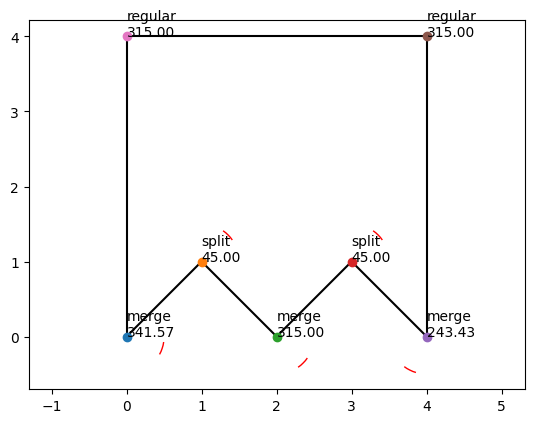

In [46]:
import numpy as np

# type of vertex: start, end, split, merge, regular
def type(p1,p2,p3):
    v1 = np.array(p2)-np.array(p1)
    v2 = np.array(p3)-np.array(p1)
    angle = np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
    angle = angle*180/np.pi
    orientation = np.cross(v1,v2)
    # print(f"p1: {p1} p2: {p2} p3: {p3}")
    # print(f"v1: {v1} v2: {v2}")
    # print(f"orientation: {orientation} angle: {angle}")
    if orientation > 0:
        angle = 360-angle

    if (p1[1] < p2[1] and p3[1] < p2[1]) and angle < np.pi:
        return 'start', angle
    elif (p1[1] < p2[1] and p3[1] < p2[1]) and angle > np.pi:
        return 'split', angle
    elif (p1[1] > p2[1] and p3[1] > p2[1]) and angle < np.pi:
        return 'end', angle
    elif (p1[1] > p2[1] and p3[1] > p2[1]) and angle > np.pi:
        return 'merge', angle
    else:
        return 'regular', angle

# test
import matplotlib.pyplot as plt
vs = [(0,0),(1,1),(2,0),(3,1),(4,0),(4,4),(0,4)]
for i in range(len(vs)-1):
    plt.plot([vs[i][0],vs[i+1][0]],[vs[i][1],vs[i+1][1]],'k')
plt.plot([vs[-1][0],vs[0][0]],[vs[-1][1],vs[0][1]],'k')
for i in range(len(vs)):
    plt.plot(vs[i][0],vs[i][1],'o')
    t = type(vs[i-1],vs[i],vs[(i+1)%len(vs)])[0]
    a = type(vs[i-1],vs[i],vs[(i+1)%len(vs)])[1]
    plt.text(vs[i][0],vs[i][1],f"{t}\n{a:.2f}")
    

plt.axis('equal')
plt.show()
